In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Gender: Feature, Categorical, "Gender"
Age : Feature, Continuous, "Age"
Height: Feature, Continuous
Weight: Feature Continuous
family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
NCP : Feature, Continuous, " How many main meals do you have daily? "
CAEC : Feature, Categorical, " Do you eat any food between meals? "
SMOKE : Feature, Binary, " Do you smoke? "
CH2O: Feature, Continuous, " How much water do you drink daily? "
SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
FAF: Feature, Continuous, " How often do you have physical activity? "
TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC : Feature, Categorical, " How often do you drink alcohol? "
MTRANS : Feature, Categorical, " Which transportation do you usually use? "
NObeyesdad : Target, Categorical, "Obesity level"


## Loading dataset

In [7]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### EDA

In [15]:
df.shape

(2111, 17)

In [8]:
df.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [14]:
df.duplicated().sum()

24

In [12]:
df[df.duplicated()==True]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
106,25.0,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
209,22.0,Female,1.69,65.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
467,22.0,Male,1.74,75.0,no,yes,3.0,3.0,no,no,1.0,yes,1.0,0.0,Frequently,Automobile,Normal_Weight
496,18.0,Male,1.72,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


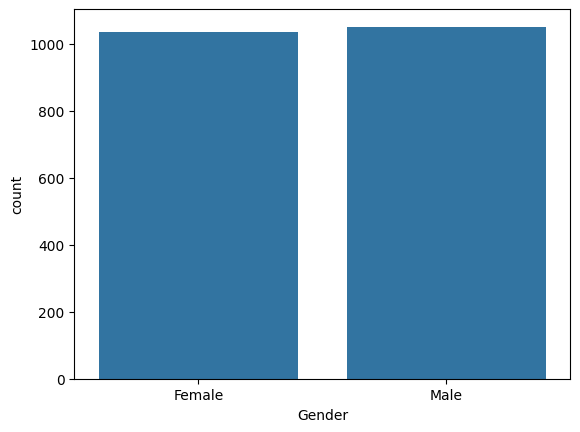

In [53]:
sns.countplot(x='Gender',data=df)
plt.show()

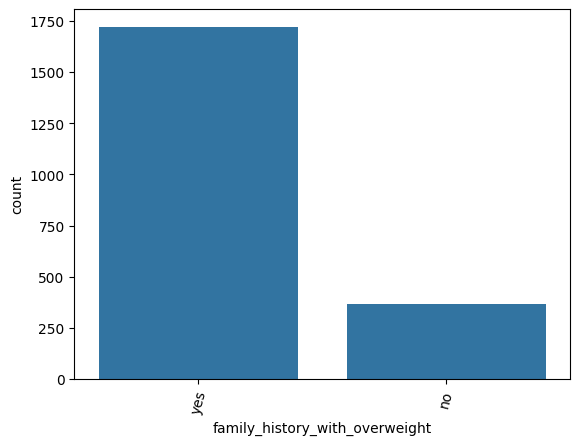

In [58]:
sns.countplot(x='family_history_with_overweight',data=df)
plt.xticks(rotation=75)
plt.show()

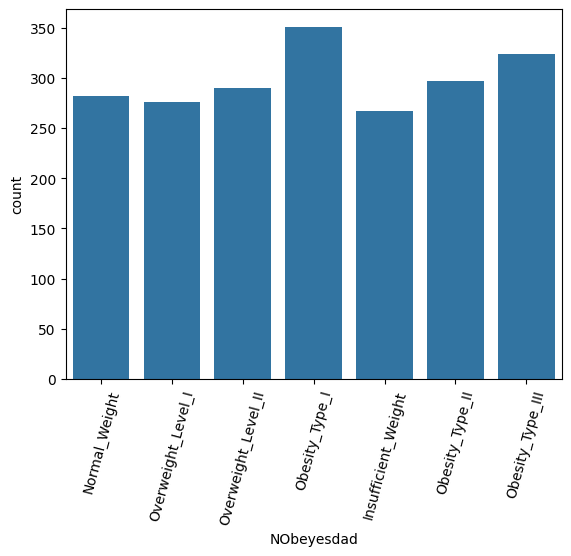

In [57]:
sns.countplot(x='NObeyesdad',data=df)
plt.xticks(rotation=75)
plt.show()

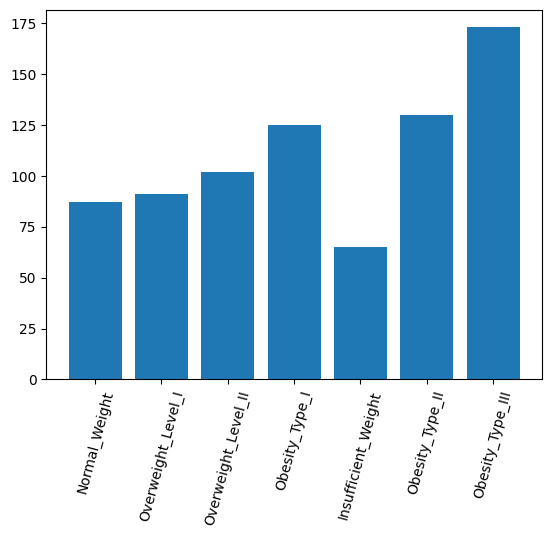

In [62]:
plt.bar(df.NObeyesdad,df.Weight)
plt.xticks(rotation=75)
plt.show()

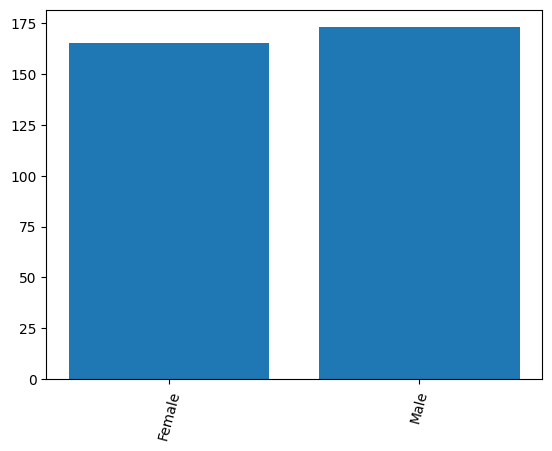

In [68]:
plt.bar(df.Gender,df.Weight)
plt.xticks(rotation=75)
plt.show()

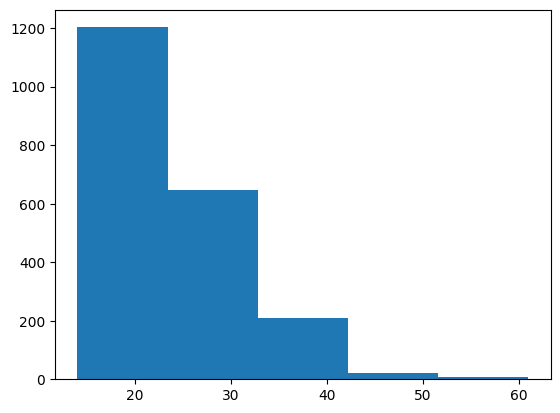

In [76]:
plt.hist(df.Age,bins=5)
plt.show()

In [91]:
trans=df.MTRANS.value_counts()
trans.values

array([1558,  456,   55,   11,    7], dtype=int64)

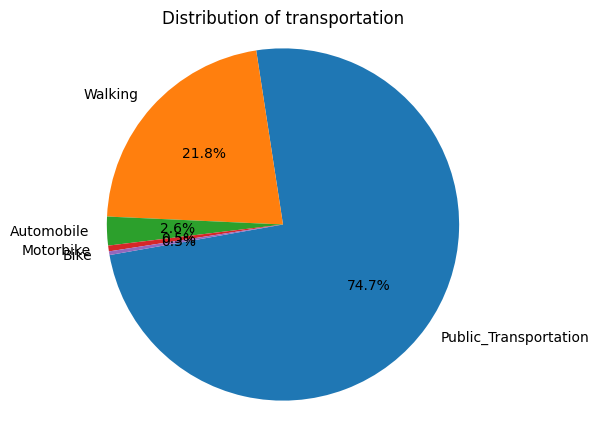

In [97]:
plt.figure(figsize=(5,5))  # Optional: Adjust figure size

plt.pie(trans, labels=df.MTRANS.unique(), autopct='%1.1f%%', startangle=190)
plt.title('Distribution of transportation')

plt.axis('equal')

plt.show()


In [16]:
df=df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(2087, 17)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   object 
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   object 
 12  FAF                             2087 no

In [20]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Preprocessing

In [22]:
categorical_cols = df.select_dtypes(include=['object', 'category'])
categorical_cols.columns

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [33]:
cols=['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS']

mod_df=pd.get_dummies(df,columns=cols)

In [34]:
mod_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,family_history_with_overweight_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight,True,...,True,False,False,True,False,False,False,False,True,False
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight,True,...,True,False,False,True,False,False,False,False,True,False
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight,False,...,True,False,False,True,False,False,False,False,True,False
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I,False,...,False,False,False,True,False,False,False,False,False,True
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III,True,...,True,False,False,True,False,False,False,False,True,False
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III,True,...,True,False,False,True,False,False,False,False,True,False
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III,True,...,True,False,False,True,False,False,False,False,True,False
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III,True,...,True,False,False,True,False,False,False,False,True,False


In [42]:
mod_df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_Female', 'Gender_Male', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'FAVC_no', 'FAVC_yes',
       'SCC_no', 'SCC_yes', 'SMOKE_no', 'SMOKE_yes',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [32]:
df.NObeyesdad.unique

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [43]:
x=mod_df.drop('NObeyesdad',axis=1)
y=df.NObeyesdad

In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)

target=onehot_encoder.fit_transform(y.values.reshape(-1,1))
target

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

### Splitting the data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=0.2,random_state=62)

### Feature Scaling

In [104]:
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [99]:
model=Sequential()

model.add(Dense(units=x_train_scaled.shape[1],activation="relu"))

model.add(Dense(units=32,activation="relu"))

model.add(Dense(units=7,activation="softmax"))

In [100]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
hist=model.fit(x_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(x_test_scaled, y_test))

Epoch 1/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3103 - loss: 1.8858 - val_accuracy: 0.5407 - val_loss: 1.2497
Epoch 2/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5869 - loss: 1.1600 - val_accuracy: 0.6842 - val_loss: 0.8548
Epoch 3/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7179 - loss: 0.8212 - val_accuracy: 0.7177 - val_loss: 0.6921
Epoch 4/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7739 - loss: 0.6455 - val_accuracy: 0.7679 - val_loss: 0.5783
Epoch 5/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.5509 - val_accuracy: 0.8014 - val_loss: 0.5028
Epoch 6/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8332 - loss: 0.4595 - val_accuracy: 0.8421 - val_loss: 0.4361
Epoch 7/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8848 - loss: 0.3790 - val_accuracy: 0.8684 - val_loss: 0.3937
Epoch 8/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9043 - loss: 0.3277 - val_accu

In [107]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

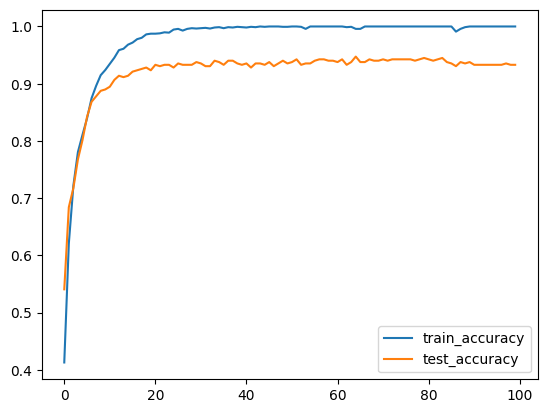

In [110]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train_accuracy',"test_accuracy"])
plt.show()

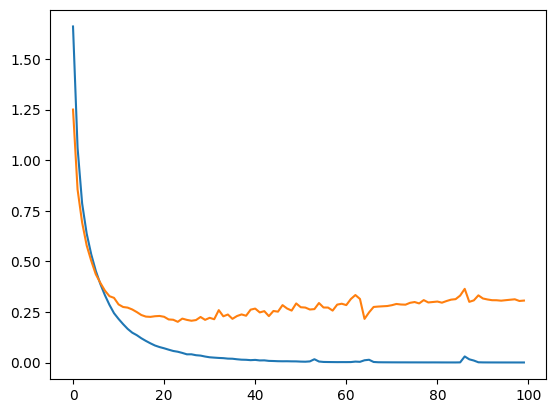

In [109]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [130]:
x_test_scaled[48].shape

(31,)

In [140]:
prediction=model.predict(x_test_scaled[48].reshape(1,-1))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[9.9987853e-01, 1.2144191e-04, 5.3549358e-35, 0.0000000e+00,
        0.0000000e+00, 2.6286439e-18, 5.1950751e-27]], dtype=float32)

In [134]:
predicted_class = np.argmax(prediction) #returns the index of largest probability
predicted_class

0

In [135]:
y_test[48]

array([1., 0., 0., 0., 0., 0., 0.])

In [143]:
encoded_categories = onehot_encoder.categories_[0]
encoded_categories

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [145]:
#predcited value
encoded_categories[0]

'Insufficient_Weight'

In [146]:
#actual value
encoded_categories[np.argmax(y_test[48])]

'Insufficient_Weight'